In [30]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
from sage.plot.point import *
import numpy

In [31]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

#stevilo_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc

In [32]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    #zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    zac_mat = mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov))
    for i in range(1, len(vse_utezi)):
        #zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
        zac_mat = numpy.add(zac_mat, mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = numpy.dot(1/len(vse_utezi), zac_mat)
    return(kon_mat)



In [33]:
def nakljucno_vozlisce(st_vozlisc1):
    start = random.randint(0, st_vozlisc1)
    end = random.randint(0,st_vozlisc1)
    if start == end:
        return nakljucno_vozlisce(st_vozlisc1)
    else:
        return[start, end]

def vsa_vozlisca(koliko, st_pov1):
    vozlisca = []
    for i in range(0, st_pov1):
        x = nakljucno_vozlisce(koliko)
        while x in vozlisca:
            x = nakljucno_vozlisce(koliko)
        vozlisca.append(x)
    return vozlisca

In [34]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

In [35]:
def grid_graf(st_opazanj, st_vozlisc, min_cena, max_cena):
    st_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc
    utezi = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = vsa_vozlisca(st_vozlisc, st_pov_grafa)
    graf_seznam = graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges()
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_grafov = []
    for j in range(0,len(utezi)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_grafov.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_grafov, utezi)

In [37]:
uer = []
def razisci(x0, x1, pov, diag, poti):
    alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
    vek_zv = numpy.add(numpy.dot(alfa_m, pov), numpy.dot((1-alfa_m),diag))
    v_alfa = numpy.dot(alfa_m, pov)
    v_1alfa = numpy.dot((1-alfa_m), diag)
    x_zv = argmin(poti, v_alfa, v_1alfa)[0]
    if numpy.dot(vek_zv, x_zv) < numpy.dot(vek_zv, x0):
        uer.append(x_zv)
        razisci(x0, x_zv, pov, diag, poti)
        razisci(x_zv, x1, pov, diag, poti)
    else:
        uer.append(argmin([x0, x1], pov, diag)[0])
    return(uer)

#def naivni_alg (x0, x1, pov, diag, poti):
#    #uer =[]
#    razisci(x0, x1, pov, diag, poti)
#    return(uer)

razisci(xln, xrn, povprecje_w, diagonalci, xi)

RecursionError: maximum recursion depth exceeded while calling a Python object

<ipython-input-31-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


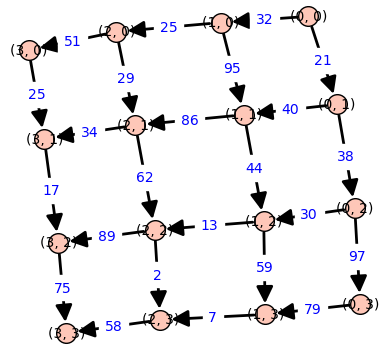

[51.333333333333336, 33.666666666666664, 46.666666666666664, 31.666666666666668, 74.33333333333333, 49.666666666666664, 77.0, 79.0, 38.333333333333336, 50.666666666666664, 37.333333333333336, 81.66666666666667, 39.0, 17.666666666666668, 67.33333333333333, 74.66666666666667, 52.0, 47.666666666666664, 19.333333333333332, 65.0, 46.333333333333336, 21.0, 53.666666666666664, 69.66666666666667]
[ 548.22222222  254.88888889 1448.22222222  288.22222222  449.55555556
  421.55555556    2.          194.66666667  112.88888889   22.88888889
 1264.88888889  280.88888889 1874.          227.55555556  748.22222222
  308.22222222  466.66666667  253.55555556  160.88888889  928.66666667
  128.22222222   88.66666667  672.88888889   14.22222222]
[[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [38]:
[grafi, weights] = grid_graf(3, 4, 1, 100)
g = grafi[0]
g.show(edge_labels = True)
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
print(povprecje_w)
#print(kov_matrika(weights))
diagonalci = numpy.diag(kov_matrika(weights))
print(diagonalci)
xi = vektorcki_x(g, (0, 0), (3, 3))
#print(weights)
print(xi)
print(len(xi))

In [39]:
def arglexmin(seznam_x, vektorji):
    xmin = min(([numpy.dot(numpy.array(v), numpy.array(x)) for v in vektorji], x) for x in seznam_x)
    return xmin

xl = arglexmin(xi, [povprecje_w, diagonalci])
xln = xl[1]
print(xl)
#print(xln)
xr = arglexmin(xi, [diagonalci, povprecje_w])
xrn = xr[1]
print(xr)
#print(xrn)
#print(numpy.dot(diagonalci,numpy.subtract(xrn,xln)) / numpy.dot(numpy.subtract(povprecje_w,diagonalci),numpy.subtract(xln,xrn)))

([238.00000000000003, 2857.111111111111], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])
([1109.111111111111, 308.99999999999994], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])


In [40]:
def argmin(poti, av_pov, diagonala):
    x_min = poti[0]
    cena_pov = numpy.dot(av_pov, x_min)
    cena_d = numpy.dot(diagonala, x_min)
    cena = cena_pov + cena_d
    #cena = numpy.dot(numpy.add(av_pov, diagonala), poti[0])
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_pov_nov = numpy.dot(av_pov, x_nov)
        cena_d_nov = numpy.dot(diagonala, x_nov)
        cena_nov = cena_pov_nov + cena_d_nov
        #cena_nov = numpy.dot(numpy.add(av_pov,diagonala), poti[i])
        if cena_nov < cena:
            x_min = x_nov
            cena_pov = cena_pov_nov
            cena_d = cena_d_nov
            cena = cena_nov
    return(x_min, cena_pov, cena_d, cena)

#[min_x, price] = argmin(xi, povprecje_w, diagonalci)
#print(min_x)
#print(price)

In [22]:
import sys
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

10000


In [43]:
#uer = []
#razisci(x0, x1, pov, diag, poti)
#[xek, alfica, uer] = razisci(xln, xrn, povprecje_w, diagonalci, xi)
#u_eks_r = naivni_alg(xln, xrn, povprecje_w, diagonalci, xi)
#print(u_eks_r)
#print(xek)
#print(alfica)
#print(uer[0])
#super_x = argmin([xln, xrn, xek], povprecje_w, diagonalci)[0]
#print(super_x)

In [62]:
#OBJ in x_rob

def argmin_kor(poti, av_pov, diagonala):
    x_rob = poti[0]
    cena_av = numpy.dot(x_rob, av_pov)
    cena_d = sqrt(numpy.dot(x_rob, diagonala))
    cena = cena_av + cena_d
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_av_nov = numpy.dot(poti[i], av_pov)
        cena_d_nov = sqrt(numpy.dot(poti[i], diagonala))
        cena_nov = cena_av_nov + cena_d_nov
        if cena_nov < cena:
            x_rob = x_nov
            cena = cena_nov
    return(x_rob, cena)

[x_rob, OBJ1] = argmin_kor([xln, xrn], povprecje_w, diagonalci)
print(x_rob)
print(OBJ1)
print(numpy.dot(numpy.add(diagonalci, povprecje_w), x_rob))

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
291.45195142472454
3095.1111111111113


([238.00000000000003, 2857.111111111111], [238.00000000000003, 1109.111111111111], [308.99999999999994, 1109.111111111111], 238.00000000000003, 258.1486316035549)


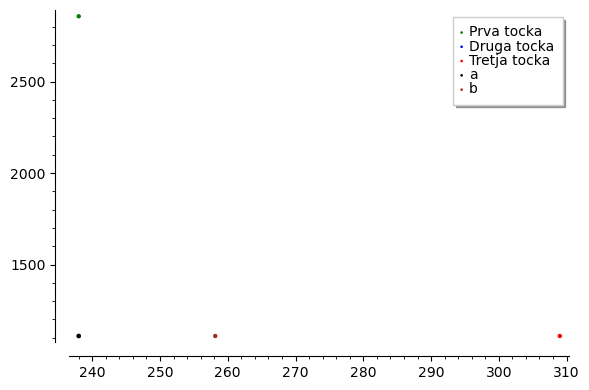

In [42]:
def tocke(utezi):
    d = numpy.diag(kov_matrika(utezi))
    avr_pov = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
    xl = arglexmin(xi, [povprecje_w, diagonalci])
    xr = arglexmin(xi, [diagonalci, povprecje_w])
    xr_obrnjen = [xr[0][1], xr[0][0]]
    prva_tocka = xl[0]
    tretja_tocka = xr_obrnjen
    druga_tocka = [prva_tocka[0], tretja_tocka[1]]
    a = druga_tocka[0]
    b = OBJ1 - sqrt(druga_tocka[1])
    return(prva_tocka, druga_tocka, tretja_tocka, a, b)
    
#da nam vrne a in b
tocke = tocke(weights)
print(tocke)
a = tocke[3]
b = tocke[4]
#print(a)
#print(b)
#print(tocke[2])

#da nam nariše spodnji graf
G = Graphics()
G += points(tocke[0], legend_label = 'Prva tocka', color = 'green')
G += points(tocke[1], legend_label = 'Druga tocka', color = 'blue')
G += points(tocke[2], legend_label = 'Tretja tocka', color = 'red')
G += points([(tocke[3], tocke[1][1])], legend_label = 'a', color = 'black')
G += points([(tocke[4], tocke[2][1])], legend_label = 'b', color = 'brown')
G.show()

[248.07431580177746, 1881.6192722371677]
[238.00000000000003, 2857.111111111111]
[238.00000000000003, 1109.111111111111]
[308.99999999999994, 1109.111111111111]


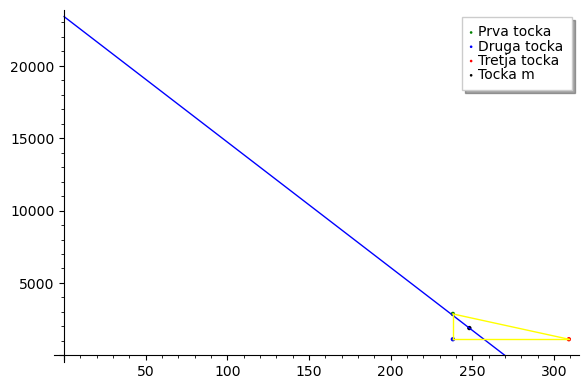

In [59]:
#poračunamo še m
m = (a + b)/2

#poračunamo naklon premice v grafu c
naklon = 2*(m-OBJ1)

#premica gre skozi točko (m, (OBJ-m)**2)

tocka_m = [m, (OBJ1-m)**2]
print(tocka_m)
print(tocke[0])
print(tocke[1])
print(tocke[2])

#če ustavimo točko_m in naklon v formulo za premico dobimo začetno točko n:
n = (OBJ1-m)^2 -naklon*m

#ravna premica v grafu c in gre skozi točko, to je
#premica = naklon * x - n

#narišem to premico
G = Graphics()
G += points(tocke[0], legend_label = 'Prva tocka', color = 'green')
G += points(tocke[1], legend_label = 'Druga tocka', color = 'blue')
G += points(tocke[2], legend_label = 'Tretja tocka', color = 'red')
G += points(tocka_m, legend_label = 'Tocka m', color = 'black')
G += line([(0,n),(-(n/naklon) ,0)])
G += line([(tocke[0]),(tocke[1])], color = 'yellow')
G += line([(tocke[0]),(tocke[2])], color = 'yellow')
G += line([(tocke[1]),(tocke[2])], color = 'yellow')
G.show()


In [60]:
#definiramo še alfo_m
alfa_m = (2*(m-OBJ1))/(2*(m-OBJ1) - 1)
print(alfa_m)

#skonstruiramo x_new

[x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(povprecje_w, alfa_m), numpy.dot((1-alfa_m), diagonalci))
print(x_new)
print(pov_x_new)
print(diag_x_new)
print(cena_x_new)

0.9886046731347004
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
235.2879122060587
32.55771500159057
267.8456272076493


In [65]:
#premica = naklon * x - n
#OBJ2 = numpy.dot(numpy.add(diagonalci, povprecje_w), x_new)
OBJ2 = numpy.dot(povprecje_w, x_new) + sqrt(numpy.dot(diagonalci, x_new))
print(OBJ2)
x = (2*(m-OBJ2)*pov_x_new - diag_x_new- n)/(2*(m-OBJ2) - naklon)
print(x)

m2 = (a + x)/2
naklon2 = 2*(m2-OBJ2)
n2 = (OBJ2-m2)^2 -naklon2*m2
tocka_m2 = [m2, (OBJ2-m2)**2]
print(naklon2)
print(n2)


alfa_m_2 = (2*(m2-OBJ2))/(2*(m2-OBJ2) - 1)
print(alfa_m_2)

[x_new2, pov_x_new2, diag_x_new2, cena_x_new2] = argmin(xi, numpy.dot(povprecje_w, alfa_m_2), numpy.dot((1-alfa_m_2), diagonalci))
print(x_new2)

x3 = (2*(m-OBJ2)*pov_x_new - diag_x_new- n)/(2*(m-OBJ2) - naklon)

G = Graphics()
G += points(tocke[0], legend_label = 'Prva tocka', color = 'green')
G += points(tocke[1], legend_label = 'Druga tocka', color = 'blue')
G += points(tocke[2], legend_label = 'Tretja tocka', color = 'red')
G += points(tocka_m2, legend_label = 'Tocka m', color = 'black')
G += line([(0,n2),(-(n2/naklon2) ,0)])
G += line([(tocke[0]),(tocke[1])], color = 'yellow')
G += line([(tocke[0]),(tocke[2])], color = 'yellow')
G += line([(tocke[1]),(tocke[2])], color = 'yellow')
G.show()

291.45195142472454
-inf
-inf
nan
nan
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


<ipython-input-65-28140d4e39a1>:5: RuntimeWarning: divide by zero encountered in double_scalars
  x = (Integer(2)*(m-OBJ2)*pov_x_new - diag_x_new- n)/(Integer(2)*(m-OBJ2) - naklon)
<ipython-input-65-28140d4e39a1>:10: RuntimeWarning: invalid value encountered in double_scalars
  n2 = (OBJ2-m2)**Integer(2) -naklon2*m2
<ipython-input-65-28140d4e39a1>:16: RuntimeWarning: invalid value encountered in double_scalars
  alfa_m_2 = (Integer(2)*(m2-OBJ2))/(Integer(2)*(m2-OBJ2) - Integer(1))
<ipython-input-65-28140d4e39a1>:22: RuntimeWarning: divide by zero encountered in double_scalars
  x3 = (Integer(2)*(m-OBJ2)*pov_x_new - diag_x_new- n)/(Integer(2)*(m-OBJ2) - naklon)


ValueError: Axis limits cannot be NaN or Inf